## Imports

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the csv file as a dataframe
call_df = pd.read_csv("311data.csv")

## Data Summary

The output below shows, first five rows of the dataset,shape of the dataset, and Summary statistics

In [3]:
# Displays first five rows in the dataset
call_df.head()

,id,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
0,23531046,NaN,111 LAWRENCE STREET,BROOKLYN,BROOKLYN,40.69283,-73.98623,7/1/2012 3:48,7/26/2012 12:29,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,7/26/2012 12:29
1,23534651,Street,5614 BROADWAY,BRONX,BRONX,40.87983,-73.90414,7/2/2012 14:05,7/17/2012 12:35,DOT,Department of Transportation,Broken Muni Meter,No Receipt,7/17/2012 12:35
2,23535556,NaN,NaN,NEW YORK,MANHATTAN,40.73986,-73.97774,7/2/2012 15:28,7/2/2012 21:00,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),7/2/2012 21:00
3,23536817,NaN,41-15 45 STREET,SUNNYSIDE,QUEENS,40.74641,-73.91898,7/2/2012 11:20,7/6/2012 0:00,DOB,Department of Buildings,Scaffold Safety,Suspended (Hanging) Scaffolds - No Pmt/Lic/Dan...,7/6/2012 0:00
4,23536826,NaN,140 EAST 46 STREET,NEW YORK,MANHATTAN,40.75378,-73.97372,7/2/2012 9:59,9/19/2012 0:00,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,9/19/2012 0:00


In [4]:
# Displays the shape of the dataset
call_df.shape

(815538, 14)

In [5]:
# Displays the Summary Statistics of the dataset in general
call_df.describe()

,id,latitude,longitude
count,8.155380e+05,815538.000000,815538.000000
mean,2.413080e+07,40.728566,-73.920981
std,3.540918e+05,0.087142,0.082524
min,2.352531e+07,40.498630,-74.254710
25%,2.382137e+07,40.664480,-73.964080
50%,2.414827e+07,40.720130,-73.924950
75%,2.442339e+07,40.807350,-73.874920
max,3.071714e+07,40.912870,-73.700390


In [6]:
# Displays the number of unique agencies
call_df.loc[:, "agency"].unique()

array(['TLC', 'DOT', 'DEP', 'DOB', 'DOHMH', 'DPR', 'NYPD', 'HPD', 'DCA',
       'DSNY', '36951', 'FDNY', 'DOITT', 'EDC', 'DOE', 'DFTA', 'HRA'],
      dtype=object)

In [7]:
# Displays the number of complaints received by agencies
call_df.loc[:, "agency"].value_counts()

HPD      281267
NYPD     151908
DOT       93924
DEP       73367
DPR       66531
DSNY      55112
DOB       42045
DOHMH     24142
TLC       10898
DCA        9091
FDNY       3247
36951      2532
DOITT       627
DOE         445
EDC         256
DFTA        145
HRA           1
Name: agency, dtype: int64

In [8]:
# Displays the number of unique compaints
call_df.loc[:, "complaint_type"].unique()

array(['Taxi Complaint', 'Broken Muni Meter', 'Water System',
       'Scaffold Safety', 'Building/Use', 'Rodent', 'Damaged Tree',
       'Noise - Residential', 'ELECTRIC', 'Blocked Driveway', 'PLUMBING',
       'Street Condition', 'Consumer Complaint', 'Dirty Conditions',
       'GENERAL CONSTRUCTION', 'Special Enforcement', 'Industrial Waste',
       'HEATING', 'Street Light Condition', 'Sewer', 'NONCONST',
       'Overgrown Tree/Branches', 'Missed Collection (All Materials)',
       'PAINT - PLASTER', 'Sweeping/Missed-Inadequate', 'Noise Survey',
       'Food Establishment', 'Elevator', 'Sanitation Condition',
       'General Construction/Plumbing', 'APPLIANCE',
       'Noise - Street/Sidewalk', 'Traffic Signal Condition',
       'Noise - Commercial', 'Derelict Vehicles', 'Illegal Parking',
       'Street Sign - Missing', 'New Tree Request',
       'Root/Sewer/Sidewalk Condition', 'Non-Emergency Police Matter',
       'Noise', 'Graffiti', 'Summer Camp', 'Asbestos',
       'Indoor Air

In [9]:
# Displays the top 5 complaint types received
call_df.loc[:, "complaint_type"].value_counts().head(10) 

HEATING                   89980
Noise - Residential       66394
GENERAL CONSTRUCTION      55883
PLUMBING                  43302
Damaged Tree              43288
PAINT - PLASTER           37721
NONCONST                  31779
Street Condition          29077
Water System              28758
Street Light Condition    26442
Name: complaint_type, dtype: int64

## Impact of Hurricane

In [10]:
# Displays the first 5 complaint dates in the dataset
call_df.loc[:, "created_date"].head()

0     7/1/2012 3:48
1    7/2/2012 14:05
2    7/2/2012 15:28
3    7/2/2012 11:20
4     7/2/2012 9:59
Name: created_date, dtype: object

In [11]:
# Changing the complaint created date, and closed date to datetime format
call_df['created_date'] = pd.to_datetime(call_df.created_date)
call_df['closed_date'] = pd.to_datetime(call_df.closed_date)
call_df.head()

,id,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
0,23531046,NaN,111 LAWRENCE STREET,BROOKLYN,BROOKLYN,40.69283,-73.98623,2012-07-01 03:48:00,2012-07-26 12:29:00,TLC,Taxi and Limousine Commission,Taxi Complaint,Driver Complaint,7/26/2012 12:29
1,23534651,Street,5614 BROADWAY,BRONX,BRONX,40.87983,-73.90414,2012-07-02 14:05:00,2012-07-17 12:35:00,DOT,Department of Transportation,Broken Muni Meter,No Receipt,7/17/2012 12:35
2,23535556,NaN,NaN,NEW YORK,MANHATTAN,40.73986,-73.97774,2012-07-02 15:28:00,2012-07-02 21:00:00,DEP,Department of Environmental Protection,Water System,Hydrant Running Full (WA4),7/2/2012 21:00
3,23536817,NaN,41-15 45 STREET,SUNNYSIDE,QUEENS,40.74641,-73.91898,2012-07-02 11:20:00,2012-07-06 00:00:00,DOB,Department of Buildings,Scaffold Safety,Suspended (Hanging) Scaffolds - No Pmt/Lic/Dan...,7/6/2012 0:00
4,23536826,NaN,140 EAST 46 STREET,NEW YORK,MANHATTAN,40.75378,-73.97372,2012-07-02 09:59:00,2012-09-19 00:00:00,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,9/19/2012 0:00


In [318]:
#A positive number of days means that the second date is older
#Reference for a 30 day gap
month_gap = call_df.loc[0, "created_date"] - datetime.strptime("6/1/2012 3:48", "%m/%d/%Y %H:%M")
month_gap

Timedelta('30 days 00:00:00')

In [319]:
# Splitting the complaints that were received from 30days before hurricane
before_hurricane_bool = datetime.strptime("10/29/2012 0:00", "%m/%d/%Y %H:%M") - call_df["created_date"] <= month_gap 
before_hurricane_bool.head()

0    False
1    False
2    False
3    False
4    False
Name: created_date, dtype: bool

In [320]:
#Displays the complaint data from 30days before hurricane
after_hurricane_df = call_df[before_hurricane_bool]
after_hurricane_df

,id,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
773,24112176,Street/Sidewalk,103 CLASSON AVENUE,BROOKLYN,BROOKLYN,40.69721,-73.96180,2012-09-29 16:59:00,2012-09-29 22:40:00,NYPD,New York City Police Department,Blocked Driveway,No Access,9/29/2012 22:39
774,24112453,NaN,2 WEST 40 STREET,NEW YORK,MANHATTAN,40.75240,-73.98231,2012-09-29 17:22:00,2012-10-15 01:07:00,DCA,Department of Consumer Affairs,Consumer Complaint,Exchange/Refund/Return,10/15/2012 1:07
775,24112596,Residential Building/House,160 LENOX ROAD,BROOKLYN,BROOKLYN,40.65388,-73.95428,2012-09-29 17:31:00,2012-09-29 17:46:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,9/29/2012 17:46
776,24112965,RESIDENTIAL BUILDING,30 PILLING STREET,BROOKLYN,BROOKLYN,40.68298,-73.90853,2012-09-29 00:00:00,2012-10-03 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB,10/3/2012 0:00
777,24112998,RESIDENTIAL BUILDING,316 EAST 93 STREET,NEW YORK,MANHATTAN,40.78204,-73.94788,2012-09-29 00:00:00,2012-10-02 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-SUPPLY,10/2/2012 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815533,24696094,RESIDENTIAL BUILDING,318 ROCHESTER AVENUE,BROOKLYN,BROOKLYN,40.66721,-73.92850,2012-12-31 00:00:00,2013-01-04 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,1/4/2013 0:00
815534,24696785,RESIDENTIAL BUILDING,71 STUYVESANT AVENUE,BROOKLYN,BROOKLYN,40.69350,-73.93415,2012-12-31 00:00:00,2013-01-03 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,1/3/2013 0:00
815535,24702974,NaN,259 MELROSE STREET,BROOKLYN,BROOKLYN,40.70190,-73.92982,2012-12-27 13:42:00,2012-12-28 00:00:00,DOB,Department of Buildings,General Construction/Plumbing,Egress - Doors Locked/Blocked/Improper/No Seco...,12/28/2012 0:00
815536,26816391,Residential Building/House,315 WEST 33 STREET,NEW YORK,MANHATTAN,40.75183,-73.99465,2012-10-16 02:30:00,2012-10-16 02:44:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10/16/2012 2:44


In [321]:
# Displays the data starting from 30 days before hurricane and 30 days after hurricane
hurricane_bool = after_hurricane_df["created_date"] - datetime.strptime("10/29/2012 0:00", "%m/%d/%Y %H:%M") <= month_gap
updated_df = after_hurricane_df[hurricane_bool]
updated_df

,id,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
773,24112176,Street/Sidewalk,103 CLASSON AVENUE,BROOKLYN,BROOKLYN,40.69721,-73.96180,2012-09-29 16:59:00,2012-09-29 22:40:00,NYPD,New York City Police Department,Blocked Driveway,No Access,9/29/2012 22:39
774,24112453,NaN,2 WEST 40 STREET,NEW YORK,MANHATTAN,40.75240,-73.98231,2012-09-29 17:22:00,2012-10-15 01:07:00,DCA,Department of Consumer Affairs,Consumer Complaint,Exchange/Refund/Return,10/15/2012 1:07
775,24112596,Residential Building/House,160 LENOX ROAD,BROOKLYN,BROOKLYN,40.65388,-73.95428,2012-09-29 17:31:00,2012-09-29 17:46:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,9/29/2012 17:46
776,24112965,RESIDENTIAL BUILDING,30 PILLING STREET,BROOKLYN,BROOKLYN,40.68298,-73.90853,2012-09-29 00:00:00,2012-10-03 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB,10/3/2012 0:00
777,24112998,RESIDENTIAL BUILDING,316 EAST 93 STREET,NEW YORK,MANHATTAN,40.78204,-73.94788,2012-09-29 00:00:00,2012-10-02 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-SUPPLY,10/2/2012 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815235,24491016,RESIDENTIAL BUILDING,3572 DEKALB AVENUE,BRONX,BRONX,40.88428,-73.87888,2012-11-28 00:00:00,2012-12-17 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,12/17/2012 0:00
815237,24492120,RESIDENTIAL BUILDING,116 PERRY STREET,NEW YORK,MANHATTAN,40.73506,-74.00652,2012-11-28 00:00:00,2012-11-29 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,11/29/2012 0:00
815239,24493581,RESIDENTIAL BUILDING,1356 WALTON AVENUE,BRONX,BRONX,40.83848,-73.91679,2012-11-28 00:00:00,2012-12-04 00:00:00,HPD,Department of Housing Preservation and Develop...,PAINT - PLASTER,CEILING,12/4/2012 0:00
815536,26816391,Residential Building/House,315 WEST 33 STREET,NEW YORK,MANHATTAN,40.75183,-73.99465,2012-10-16 02:30:00,2012-10-16 02:44:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10/16/2012 2:44


In [322]:
#Reference for time gap of 1 minute
minute_gap = call_df.loc[0,"created_date"] - datetime.strptime("7/1/2012 3:47", "%m/%d/%Y %H:%M")
split_bool = updated_df["created_date"] - datetime.strptime("10/29/2012 0:00", "%m/%d/%Y %H:%M") > minute_gap
split_bool

773       False
774       False
775       False
776       False
777       False
          ...  
815235     True
815237     True
815239     True
815536    False
815537    False
Name: created_date, Length: 283852, dtype: bool

In [323]:
after_hurricane_df = updated_df[split_bool]

In [324]:
#Displays complaint data for 30 days before hurricane
before_hurricane_df = updated_df[-split_bool]
before_hurricane_df

,id,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
773,24112176,Street/Sidewalk,103 CLASSON AVENUE,BROOKLYN,BROOKLYN,40.69721,-73.96180,2012-09-29 16:59:00,2012-09-29 22:40:00,NYPD,New York City Police Department,Blocked Driveway,No Access,9/29/2012 22:39
774,24112453,NaN,2 WEST 40 STREET,NEW YORK,MANHATTAN,40.75240,-73.98231,2012-09-29 17:22:00,2012-10-15 01:07:00,DCA,Department of Consumer Affairs,Consumer Complaint,Exchange/Refund/Return,10/15/2012 1:07
775,24112596,Residential Building/House,160 LENOX ROAD,BROOKLYN,BROOKLYN,40.65388,-73.95428,2012-09-29 17:31:00,2012-09-29 17:46:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,9/29/2012 17:46
776,24112965,RESIDENTIAL BUILDING,30 PILLING STREET,BROOKLYN,BROOKLYN,40.68298,-73.90853,2012-09-29 00:00:00,2012-10-03 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,BATHTUB,10/3/2012 0:00
777,24112998,RESIDENTIAL BUILDING,316 EAST 93 STREET,NEW YORK,MANHATTAN,40.78204,-73.94788,2012-09-29 00:00:00,2012-10-02 00:00:00,HPD,Department of Housing Preservation and Develop...,PLUMBING,WATER-SUPPLY,10/2/2012 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814915,24278087,RESIDENTIAL BUILDING,553 46 STREET,BROOKLYN,BROOKLYN,40.64666,-74.00684,2012-10-27 00:00:00,2012-11-08 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,FLOOR,11/8/2012 0:00
814916,24280086,NaN,783 PINE ST,BROOKLYN,BROOKLYN,40.66600,-73.86861,2012-10-28 22:55:00,2012-11-01 15:45:00,DEP,Department of Environmental Protection,Air Quality,"Air: Dust, Construction/Demolition (AE4)",11/1/2012 15:45
815016,24340817,Street,NaN,BRONX,BRONX,40.87490,-73.88042,2012-10-26 22:17:00,2012-10-29 12:00:00,DSNY,BCC - Bronx,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,10/29/2012 12:00
815536,26816391,Residential Building/House,315 WEST 33 STREET,NEW YORK,MANHATTAN,40.75183,-73.99465,2012-10-16 02:30:00,2012-10-16 02:44:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10/16/2012 2:44


In [325]:
#Displays complaint data for 30 days after hurricane
after_hurricane_df

,id,location_type,incident_address,city,borough,latitude,longitude,created_date,closed_date,agency,agency_name,complaint_type,description,resolution_date
1005,24282122,Street,82-39 164 PLACE,JAMAICA,QUEENS,40.71850,-73.80243,2012-10-29 17:04:00,2012-11-01 12:09:00,DPR,Department of Parks and Recreation,Damaged Tree,Tree Leaning/Uprooted,11/1/2012 12:09
1006,24282526,Street,116 CLINTON AVENUE,BROOKLYN,BROOKLYN,40.69435,-73.96906,2012-10-30 13:04:00,2012-10-31 09:04:00,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,10/31/2012 9:04
1007,24284103,Street,174 CROSS STREET,BRONX,BRONX,40.85347,-73.78883,2012-10-30 11:52:00,2012-10-31 12:10:00,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,10/31/2012 12:09
1008,24284862,NaN,83-30 BEVERLY ROAD,Kew Gardens,QUEENS,40.70832,-73.83237,2012-10-29 19:58:00,2013-01-17 09:39:00,DOT,Department of Transportation,Street Light Condition,Lamppost Knocked Down,12/4/2012 14:28
1009,24285209,Street,101-49 75 ROAD,FOREST HILLS,QUEENS,40.71062,-73.84270,2012-10-29 20:45:00,2012-11-01 13:49:00,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,11/1/2012 13:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815233,24490077,RESIDENTIAL BUILDING,810 WASHINGTON AVENUE,BROOKLYN,BROOKLYN,40.67382,-73.96301,2012-11-28 00:00:00,2012-11-30 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,11/30/2012 0:00
815234,24490188,RESIDENTIAL BUILDING,175 ROGERS AVENUE,BROOKLYN,BROOKLYN,40.67138,-73.95313,2012-11-28 00:00:00,2012-12-02 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,12/2/2012 0:00
815235,24491016,RESIDENTIAL BUILDING,3572 DEKALB AVENUE,BRONX,BRONX,40.88428,-73.87888,2012-11-28 00:00:00,2012-12-17 00:00:00,HPD,Department of Housing Preservation and Develop...,GENERAL CONSTRUCTION,WINDOWS,12/17/2012 0:00
815237,24492120,RESIDENTIAL BUILDING,116 PERRY STREET,NEW YORK,MANHATTAN,40.73506,-74.00652,2012-11-28 00:00:00,2012-11-29 00:00:00,HPD,Department of Housing Preservation and Develop...,HEATING,HEAT,11/29/2012 0:00


In [326]:
# Displays number of complaints received for 30 days before and after hurricane
print("Number of complaints for 30 days before hurricane",before_hurricane_df.shape[0])
print("Number of complaints for 30 days after hurricane",after_hurricane_df.shape[0])
print("{:} more complaints were received for the month after hurricane than the month before".format(after_hurricane_df.shape[0] - before_hurricane_df.shape[0]))

Number of complaints for 30 days before hurricane 125215
Number of complaints for 30 days after hurricane 158637
33422 more complaints were received for the month after hurricane than the month before


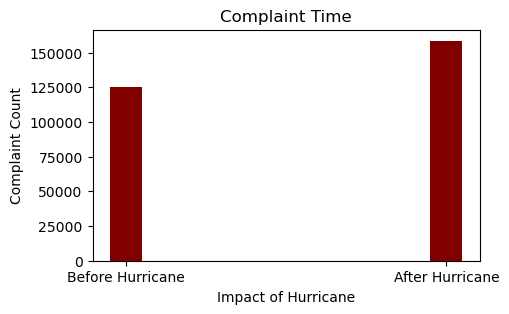

In [327]:
# The plot displays the above result
Complaints_hurricane = {'Before Hurricane':before_hurricane_df.shape[0], 'After Hurricane':after_hurricane_df.shape[0]}
Complaint_Time = list(Complaints_hurricane.keys())
values = list(Complaints_hurricane.values())  
fig = plt.figure(figsize = (5, 3))
# creating the bar plot
plt.bar(Complaint_Time, values, color ='maroon',width = 0.1)
plt.xlabel("Impact of Hurricane")
plt.ylabel("Complaint Count")
plt.title("Complaint Time")
plt.show()

In [328]:
# Displays the unique compalint types and their counts during one month after the hurricane
unique_complaints = after_hurricane_df["complaint_type"].value_counts()
unique_complaints

HEATING                                 38331
Damaged Tree                            30524
Noise - Residential                      8878
GENERAL CONSTRUCTION                     8812
PLUMBING                                 6680
                                        ...  
Building Condition                          1
Stalled Sites                               1
Bottled Water                               1
Special Natural Area District (SNAD)        1
Illegal Tree Damage                         1
Name: complaint_type, Length: 145, dtype: int64

In [329]:
# Displays the top 10 complaint types during one month after the hurricane
top_10_complaints = unique_complaints[0:10]
top_10_complaints

HEATING                     38331
Damaged Tree                30524
Noise - Residential          8878
GENERAL CONSTRUCTION         8812
PLUMBING                     6680
PAINT - PLASTER              5102
Street Light Condition       4634
Traffic Signal Condition     4619
NONCONST                     4171
Blocked Driveway             3799
Name: complaint_type, dtype: int64

The graph below shows the top ten types of complaints and how many complaints of each type there were for one month after the hurricane. These types of complaints seem to line up for the types we expect to happen right after a hurricane, such as problems with heating, damaged trees, traffic light problems, etc."HEATING" is the highest complaint type received during a month after hurricane.

<AxesSubplot:title={'center':'Top 10 Types of Complaints'}>

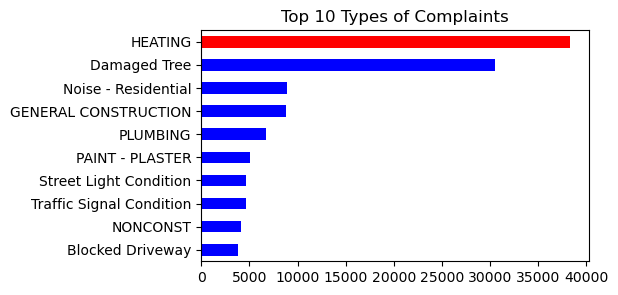

In [91]:
# The plot shows the top 10 complaint types during a month after hurricane
fig = plt.figure(figsize = (5, 3))
top_10_complaints.iloc[::-1].plot.barh(color = ["blue", "blue", "blue","blue","blue","blue","blue","blue","blue","red"],title = "Top 10 Types of Complaints")

In [39]:
# Displays the unique agencies serving during a month after hurricane
unique_agencies = after_hurricane_df["agency"].value_counts()
unique_agencies

HPD      67107
DPR      30831
NYPD     18164
DOT      15517
DEP       9193
DOB       6187
DSNY      4537
DOHMH     2717
DCA       2044
TLC       1622
FDNY       365
36951      164
DOE         98
DOITT       42
EDC         39
DFTA        10
Name: agency, dtype: int64

In [40]:
# Displays the top 10 agencies serving during a month after hurricane
top_10_agencies = unique_agencies[0:10]
top_10_agencies

HPD      67107
DPR      30831
NYPD     18164
DOT      15517
DEP       9193
DOB       6187
DSNY      4537
DOHMH     2717
DCA       2044
TLC       1622
Name: agency, dtype: int64

The graph below shows the top 10 agencies that had the highest service requests one month after the hurricane, with HPD being at the top.

<AxesSubplot:title={'center':'Top 10 Agencies contacted for service requests'}>

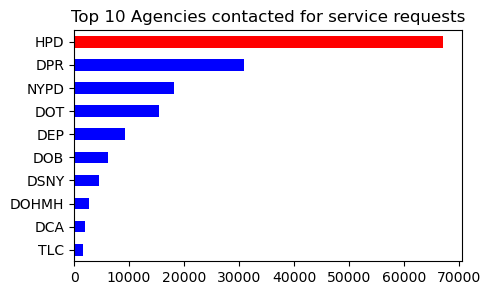

In [41]:
# The plot shows the top 10 agencies that received the highest service requests during a month after hurricane
fig = plt.figure(figsize = (5, 3))
top_10_agencies.iloc[::-1].plot.barh(color = ["blue", "blue", "blue","blue","blue","blue","blue","blue","blue","red"],
                                     title = "Top 10 Agencies contacted for service requests")

### Managerial Insights
33422 additional service requests have been made after Hurricane. Due to the damage from the hurricane, "HEATING" and "Damaged Tree" service calls were the most frequent. "HPD - Department of Housing Preservation and Development" and "DPR - Department of Parks and Recreation" are the departments responsible for handling these service requests. Prior to the hurricane, it is the duty of these agencies to be on high alert so that they can handle the mass requests right away. All municipality agencies should have the resources—both manpower and facilities—necessary to respond to service requests promptly.

## Impact of Covid-19 on Service Requests

In [19]:
# Reading the latest NYC service requests data(Apr 2019 - Mar 2021)as a dataframe
#The anlaysis is done on 180 days before and after covid data
call_covid = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

/var/folders/gl/scblwhd978d5d_yv873skcrc0000gn/T/ipykernel_1562/178731455.py:3: DtypeWarning: Columns (8,17,20,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  call_covid = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


In [20]:
call_covid.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],
      dtype='object')

In [21]:
call_covid.drop(['Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type','Landmark', 'Facility Type', 'Status', 'Due Date','Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Codes', 'Community Districts',
       'Borough Boundaries', 'City Council Districts', 'Police Precincts'],axis=1,inplace=True)

In [22]:
call_covid.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Resolution Description,Resolution Action Updated Date
0,50160669,03/31/2021 11:58:52 PM,04/01/2021 12:28:36 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11225.0,1639 BEDFORD AVENUE,BEDFORD AVENUE,BROOKLYN,The Police Department responded to the complai...,04/01/2021 12:28:38 AM
1,50156916,03/31/2021 11:58:51 PM,04/01/2021 12:16:18 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11421.0,84-05 90 STREET,90 STREET,WOODHAVEN,The Police Department responded to the complai...,04/01/2021 12:16:21 AM
2,50156386,03/31/2021 11:58:31 PM,04/01/2021 01:23:26 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11356.0,18-11 124 STREET,124 STREET,COLLEGE POINT,The Police Department responded to the complai...,04/01/2021 01:23:29 AM
3,50162991,03/31/2021 11:57:21 PM,04/01/2021 12:39:08 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11207.0,355 NEW JERSEY AVENUE,NEW JERSEY AVENUE,BROOKLYN,The Police Department responded to the complai...,04/01/2021 12:39:12 AM
4,50165188,03/31/2021 11:57:00 PM,04/01/2021 01:50:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11214.0,NaN,NaN,BROOKLYN,Service Request status for this request is ava...,04/01/2021 01:50:00 AM


On February 29, 2020, the first COVID-19 case in New York City was identified. The 180 days prior to and following COVID-19 are used to examine the COVID-19 impact on service requests.

### Department wise Service Request Analysis before and after COVID-19

In [24]:
call_covid['Created Date'] = pd.to_datetime(call_covid['Created Date']) #takes a while to compute

In [25]:
month_gap_6 = call_covid.loc[0,'Created Date'] - datetime.strptime("10/2/2020 12:00", "%m/%d/%Y %H:%M")
month_gap_6

Timedelta('180 days 11:58:52')

In [26]:
before_covid_bool = datetime.strptime("02/29/2020 0:00", "%m/%d/%Y %H:%M") > call_covid['Created Date']
before_covid = call_covid[before_covid_bool] 
before_covid

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Resolution Description,Resolution Action Updated Date
3253068,45715731,2020-02-28 23:58:45,02/29/2020 07:34:02 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10460.0,1120 WYATT STREET,WYATT STREET,BRONX,The Police Department responded to the complai...,02/29/2020 07:34:03 AM
3253069,45721054,2020-02-28 23:58:40,02/29/2020 07:54:30 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,NaN,10457.0,2165 RYER AVENUE,RYER AVENUE,BRONX,The Police Department reviewed your complaint ...,02/29/2020 07:54:32 AM
3253070,45718908,2020-02-28 23:58:17,02/29/2020 02:45:41 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,NaN,11429.0,218-16 103 AVENUE,103 AVENUE,QUEENS VILLAGE,The Police Department issued a summons in resp...,02/29/2020 02:45:55 AM
3253071,45715105,2020-02-28 23:57:34,02/29/2020 12:24:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10002.0,40 RIVINGTON STREET,RIVINGTON STREET,NEW YORK,The Police Department responded to the complai...,02/29/2020 12:24:05 AM
3253072,45718930,2020-02-28 23:57:16,02/29/2020 05:05:34 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10304.0,29 WARREN STREET,WARREN STREET,STATEN ISLAND,The Police Department responded to the complai...,02/29/2020 05:05:35 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5580515,42112618,2019-04-01 00:00:00,04/08/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11691.0,22-45 DIX AVENUE,DIX AVENUE,Far Rockaway,The Department of Health and Mental Hygiene wi...,04/08/2019 12:00:00 AM
5580516,42112617,2019-04-01 00:00:00,04/12/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,10065.0,107 EAST 63 STREET,EAST 63 STREET,NEW YORK,The Department of Health and Mental Hygiene wi...,04/11/2019 12:00:00 AM
5580517,42112600,2019-04-01 00:00:00,04/01/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,10001.0,128 WEST 26 STREET,WEST 26 STREET,NEW YORK,The Department of Health and Mental Hygiene wi...,04/01/2019 09:06:27 PM
5580518,42112599,2019-04-01 00:00:00,04/16/2019 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11208.0,518 CRESCENT STREET,CRESCENT STREET,BROOKLYN,The Department of Health and Mental Hygiene wi...,04/15/2019 12:00:00 AM


In [27]:
before_covid_180_bool = datetime.strptime("02/29/2020 0:00", "%m/%d/%Y %H:%M") - before_covid['Created Date'] <= month_gap_6
before_covid_180_bool

3253068     True
3253069     True
3253070     True
3253071     True
3253072     True
           ...  
5580515    False
5580516    False
5580517    False
5580518    False
5580519    False
Name: Created Date, Length: 2327452, dtype: bool

In [28]:
before_covid_180 = before_covid[before_covid_180_bool]
before_covid_180

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Resolution Description,Resolution Action Updated Date
3253068,45715731,2020-02-28 23:58:45,02/29/2020 07:34:02 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10460.0,1120 WYATT STREET,WYATT STREET,BRONX,The Police Department responded to the complai...,02/29/2020 07:34:03 AM
3253069,45721054,2020-02-28 23:58:40,02/29/2020 07:54:30 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,NaN,10457.0,2165 RYER AVENUE,RYER AVENUE,BRONX,The Police Department reviewed your complaint ...,02/29/2020 07:54:32 AM
3253070,45718908,2020-02-28 23:58:17,02/29/2020 02:45:41 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,NaN,11429.0,218-16 103 AVENUE,103 AVENUE,QUEENS VILLAGE,The Police Department issued a summons in resp...,02/29/2020 02:45:55 AM
3253071,45715105,2020-02-28 23:57:34,02/29/2020 12:24:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10002.0,40 RIVINGTON STREET,RIVINGTON STREET,NEW YORK,The Police Department responded to the complai...,02/29/2020 12:24:05 AM
3253072,45718930,2020-02-28 23:57:16,02/29/2020 05:05:34 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10304.0,29 WARREN STREET,WARREN STREET,STATEN ISLAND,The Police Department responded to the complai...,02/29/2020 05:05:35 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4424513,43698931,2019-09-01 12:02:06,09/01/2019 07:31:57 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11218.0,3765 18 AVENUE,18 AVENUE,BROOKLYN,The Police Department responded to the complai...,09/01/2019 07:32:02 PM
4424514,43696532,2019-09-01 12:02:04,09/01/2019 12:09:38 PM,NYPD,New York City Police Department,Abandoned Vehicle,With License Plate,NaN,10471.0,ARLINGTON AVENUE,ARLINGTON AVENUE,NaN,The Police Department responded to the complai...,09/01/2019 12:09:44 PM
4424515,43694630,2019-09-01 12:02:00,09/04/2019 10:06:00 AM,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11233.0,304 STUYVESANT AVENUE,STUYVESANT AVENUE,BROOKLYN,The Department of Environmental Protection res...,09/04/2019 10:06:00 AM
4424516,43698666,2019-09-01 12:01:50,12/17/2019 04:07:42 PM,DOT,Department of Transportation,Street Sign - Missing,Other/Unknown,Street,11358.0,161-16 LABURNUM AVENUE,LABURNUM AVENUE,FLUSHING,The Department of Transportation has completed...,12/17/2019 04:07:44 PM


In [29]:
after_covid_bool = datetime.strptime("02/29/2020 0:00", "%m/%d/%Y %H:%M") < call_covid['Created Date']
after_covid = call_covid[after_covid_bool] 
after_covid

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Resolution Description,Resolution Action Updated Date
0,50160669,2021-03-31 23:58:52,04/01/2021 12:28:36 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11225.0,1639 BEDFORD AVENUE,BEDFORD AVENUE,BROOKLYN,The Police Department responded to the complai...,04/01/2021 12:28:38 AM
1,50156916,2021-03-31 23:58:51,04/01/2021 12:16:18 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11421.0,84-05 90 STREET,90 STREET,WOODHAVEN,The Police Department responded to the complai...,04/01/2021 12:16:21 AM
2,50156386,2021-03-31 23:58:31,04/01/2021 01:23:26 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11356.0,18-11 124 STREET,124 STREET,COLLEGE POINT,The Police Department responded to the complai...,04/01/2021 01:23:29 AM
3,50162991,2021-03-31 23:57:21,04/01/2021 12:39:08 AM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11207.0,355 NEW JERSEY AVENUE,NEW JERSEY AVENUE,BROOKLYN,The Police Department responded to the complai...,04/01/2021 12:39:12 AM
4,50165188,2021-03-31 23:57:00,04/01/2021 01:50:00 AM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11214.0,NaN,NaN,BROOKLYN,Service Request status for this request is ava...,04/01/2021 01:50:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253054,45720834,2020-02-29 00:01:18,02/29/2020 05:14:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,4402 10 AVENUE,10 AVENUE,BROOKLYN,The Police Department issued a summons in resp...,02/29/2020 05:14:06 AM
3253055,45718969,2020-02-29 00:01:06,02/29/2020 06:51:20 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10474.0,621 MANIDA STREET,MANIDA STREET,BRONX,The Police Department responded to the complai...,02/29/2020 06:51:22 AM
3253056,45715406,2020-02-29 00:01:00,03/03/2020 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10003.0,240 EAST 9 STREET,EAST 9 STREET,NEW YORK,NaN,03/03/2020 12:00:00 AM
3253057,45713817,2020-02-29 00:00:15,02/29/2020 12:32:02 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11203.0,5520 CLARENDON ROAD,CLARENDON ROAD,BROOKLYN,The Police Department responded to the complai...,02/29/2020 12:32:09 AM


In [30]:
after_covid_180_bool = after_covid['Created Date']-datetime.strptime("02/29/2020 0:00", "%m/%d/%Y %H:%M")<= month_gap_6
after_covid_180 = after_covid[after_covid_180_bool]
after_covid_180


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,City,Resolution Description,Resolution Action Updated Date
1741604,47383094,2020-08-27 11:58:37,08/27/2020 12:20:02 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11366.0,158-39 78 AVENUE,78 AVENUE,FRESH MEADOWS,The Police Department responded to the complai...,08/27/2020 12:20:03 PM
1741605,47378727,2020-08-27 11:58:23,08/27/2020 12:14:36 PM,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,NaN,11238.0,307 EASTERN PARKWAY,EASTERN PARKWAY,BROOKLYN,The Police Department responded to the complai...,08/27/2020 12:14:39 PM
1741606,47380353,2020-08-27 11:58:13,08/28/2020 11:02:50 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,11208.0,400 RIDGEWOOD AVENUE,RIDGEWOOD AVENUE,BROOKLYN,The Department of Parks and Recreation inspect...,08/28/2020 11:02:57 AM
1741607,47376689,2020-08-27 11:58:12,NaN,DPR,Department of Parks and Recreation,New Tree Request,For One Address,Street,11232.0,871 5 AVENUE,5 AVENUE,BROOKLYN,NYC Parks reviewed this request and will visit...,07/01/2021 01:21:36 PM
1741608,47382151,2020-08-27 11:58:08,08/27/2020 12:02:01 PM,DHS,Department of Homeless Services,Homeless Person Assistance,NaN,NaN,10021.0,1357 FIRST AVENUE,FIRST AVENUE,NEW YORK,The Department of Homeless Services did not ha...,08/27/2020 12:02:01 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253054,45720834,2020-02-29 00:01:18,02/29/2020 05:14:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11219.0,4402 10 AVENUE,10 AVENUE,BROOKLYN,The Police Department issued a summons in resp...,02/29/2020 05:14:06 AM
3253055,45718969,2020-02-29 00:01:06,02/29/2020 06:51:20 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,10474.0,621 MANIDA STREET,MANIDA STREET,BRONX,The Police Department responded to the complai...,02/29/2020 06:51:22 AM
3253056,45715406,2020-02-29 00:01:00,03/03/2020 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10003.0,240 EAST 9 STREET,EAST 9 STREET,NEW YORK,NaN,03/03/2020 12:00:00 AM
3253057,45713817,2020-02-29 00:00:15,02/29/2020 12:32:02 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11203.0,5520 CLARENDON ROAD,CLARENDON ROAD,BROOKLYN,The Police Department responded to the complai...,02/29/2020 12:32:09 AM


In [31]:
before_covid_180['Complaint Type'].unique()

array(['Noise - Residential', 'Illegal Parking',
       'Noise - Street/Sidewalk', 'Sanitation Condition',
       'Request Large Bulky Item Collection', 'Noise - Commercial',
       'Blocked Driveway', 'Noise - Vehicle', 'Street Light Condition',
       'Sewer', 'Noise', 'Street Condition', 'Rodent',
       'Electronics Waste Appointment', 'Highway Condition',
       'Noise - Helicopter', 'Traffic Signal Condition', 'Animal-Abuse',
       'Consumer Complaint', 'Abandoned Vehicle',
       'Emergency Response Team (ERT)', 'Other Enforcement', 'Elevator',
       'Lost Property', 'ELECTRIC', 'New Tree Request', 'HEAT/HOT WATER',
       'FLOORING/STAIRS', 'Overgrown Tree/Branches',
       'UNSANITARY CONDITION', 'Taxi Complaint', 'Sidewalk Condition',
       'Air Quality', 'GENERAL', 'Lead', 'Non-Emergency Police Matter',
       'Street Sign - Missing', 'PLUMBING', 'Boilers',
       'General Construction/Plumbing', 'Indoor Air Quality',
       'Building/Use', 'For Hire Vehicle Complaint', '

In [32]:
top_agencies_bcovid = before_covid_180[['Agency','Agency Name']].value_counts()
top_agencies_bcovid

Agency  Agency Name                                                
NYPD    New York City Police Department                                402212
DSNY    Department of Sanitation                                       215227
HPD     Department of Housing Preservation and Development             198600
DOT     Department of Transportation                                   126721
DEP     Department of Environmental Protection                          72348
DOB     Department of Buildings                                         46611
DPR     Department of Parks and Recreation                              37768
DOHMH   Department of Health and Mental Hygiene                         27352
TLC     Taxi and Limousine Commission                                   22544
DHS     Department of Homeless Services                                 11442
DCA     Department of Consumer Affairs                                   6033
EDC     Economic Development Corporation                                 3

<AxesSubplot:title={'center':'Number of times Agencies were contacted before covid19'}, ylabel='Agency,Agency Name'>

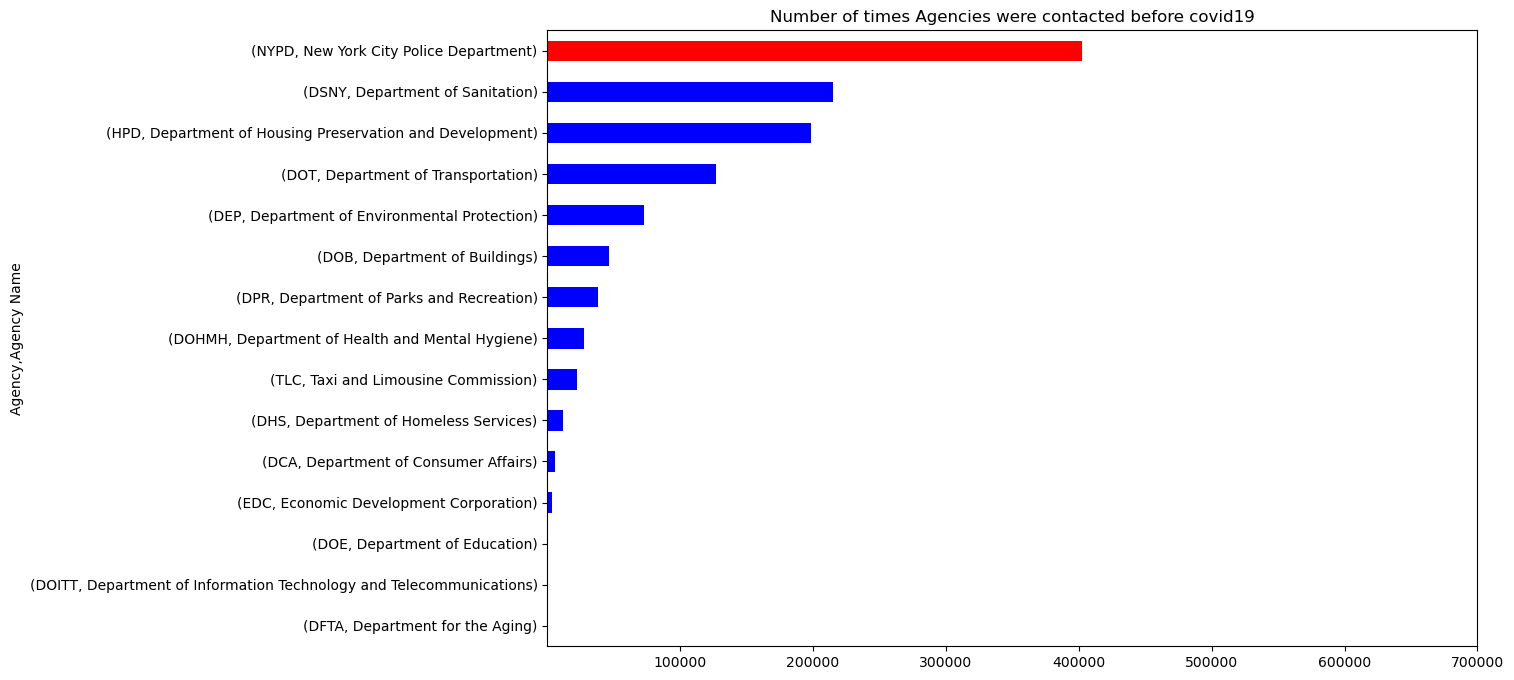

In [33]:
fig = plt.figure(figsize = (12, 8))
top_agencies_bcovid.iloc[::-1].plot.barh(color = ["blue", "blue", "blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","red"],xticks=[100000,200000,300000,400000,500000,600000,700000],
                                     title = "Number of times Agencies were contacted before covid19")

In [34]:
top_agencies_Acovid = after_covid_180[['Agency','Agency Name']].value_counts()
top_agencies_Acovid

Agency  Agency Name                                                
NYPD    New York City Police Department                                704142
DSNY    Department of Sanitation                                       222781
HPD     Department of Housing Preservation and Development             159543
DPR     Department of Parks and Recreation                             107118
DOT     Department of Transportation                                    99509
DEP     Department of Environmental Protection                          72013
DOB     Department of Buildings                                         43189
DOHMH   Department of Health and Mental Hygiene                         29391
DCA     Department of Consumer Affairs                                  27456
OSE     Mayorâs Office of Special Enforcement                         22019
DHS     Department of Homeless Services                                 13761
TLC     Taxi and Limousine Commission                                    4

<AxesSubplot:title={'center':'Number of times Agencies were contacted after covid19'}, ylabel='Agency,Agency Name'>

/Users/gvg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gvg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


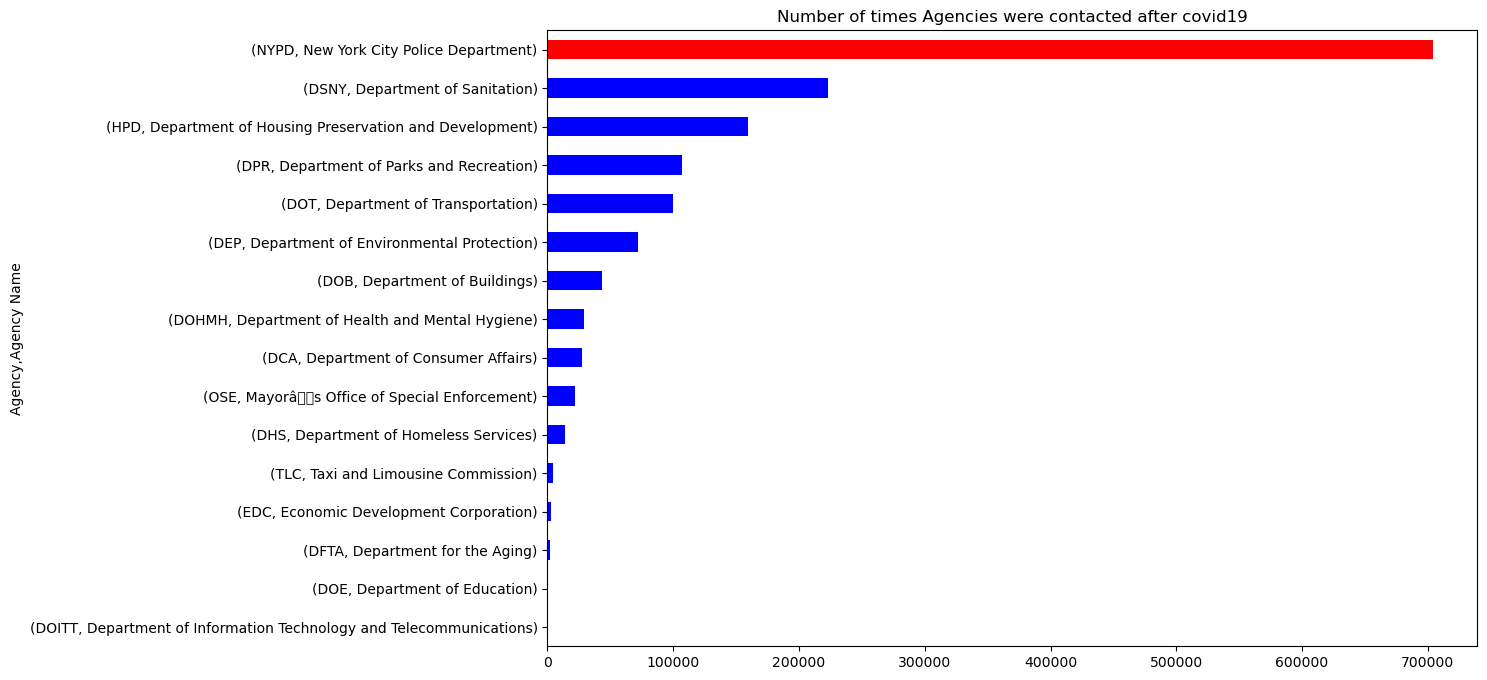

In [35]:
fig = plt.figure(figsize = (12,8))
top_agencies_Acovid.iloc[::-1].plot.barh(color = ["blue", "blue", "blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","red"],
                                     title = "Number of times Agencies were contacted after covid19")

In [36]:
complaints_bcovid = before_covid_180['Complaint Type'].value_counts()
top_10_complaints_bcovid = complaints_bcovid[0:10]
top_10_complaints_bcovid

HEAT/HOT WATER                         131026
Noise - Residential                    114145
Request Large Bulky Item Collection    103631
Illegal Parking                        101899
Blocked Driveway                        70049
Street Condition                        34477
Noise - Street/Sidewalk                 32950
Street Light Condition                  32128
Electronics Waste Appointment           24202
Noise                                   23966
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Number of requested services before covid19'}>

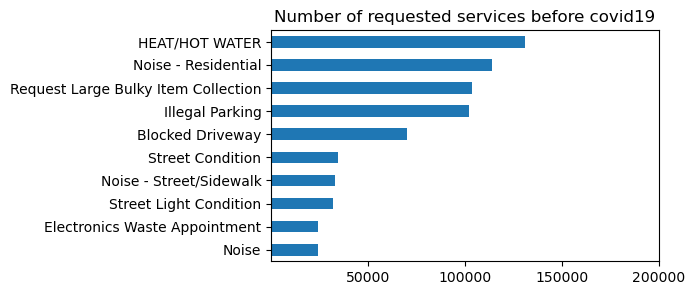

In [37]:
fig = plt.figure(figsize = (5, 3))
top_10_complaints_bcovid.iloc[::-1].plot.barh(title = "Number of requested services before covid19",xticks=[50000,100000,150000,200000])

In [38]:
complaints_Acovid = after_covid_180['Complaint Type'].value_counts()
top_10_complaints_Acovid = complaints_Acovid[0:10]
top_10_complaints_Acovid

Noise - Residential                    216664
Request Large Bulky Item Collection    145415
Noise - Street/Sidewalk                134908
Illegal Parking                         79223
Non-Emergency Police Matter             77627
Damaged Tree                            59245
Illegal Fireworks                       48270
Noise - Vehicle                         44023
Blocked Driveway                        43478
HEAT/HOT WATER                          42468
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Number of requested services after covid19'}>

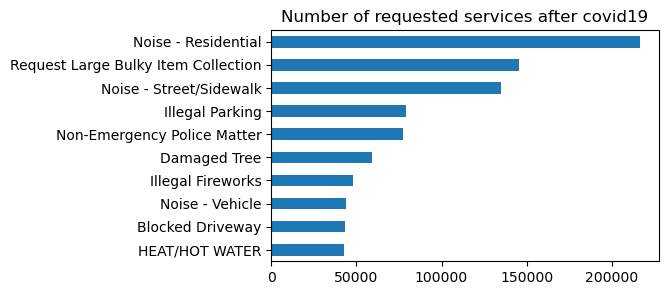

In [39]:
fig = plt.figure(figsize = (5, 3))
top_10_complaints_Acovid.iloc[::-1].plot.barh(title = "Number of requested services after covid19")

In both cases, before and after COVID-19, the NYPD(New York City Police Department) had received the highest number of service requests, followed by DSNY(Department of Sanitation), and HPD(Department of Housing Preservation and Development).

### Department wise Service Request Analysis before and after COVID-19

There is a big difference seen in the service type requested, before and after COVID-19. Before COVID-19,'HEAT/HOT WATER' service requests were high but after COVID-19, 'Noise-Residential' service requests were high. This clearly shows, there was a big impact of COVID-19 on the type of services requested. Because of the pandemic, there was a lockdown and everyone stayed at home, and this would have increased the 'Noise-Residential' service request. This service request count almost doubled after the pandemic.

Now, let's analyse about the type of service request top agencies received before and after covid19.

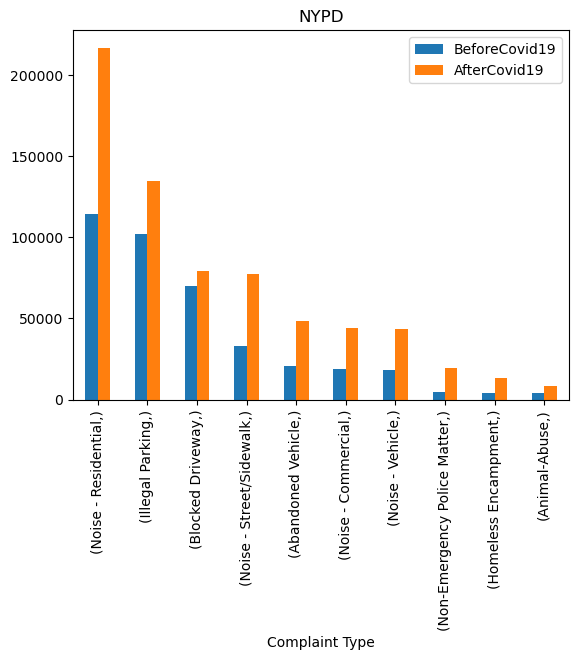

In [40]:
# Analysis of NYPD department service requests
NYPD_Comp_bcovid = before_covid_180.loc[(before_covid_180['Agency'] == 'NYPD'),['Complaint Type']].value_counts()
top_10 = NYPD_Comp_bcovid[0:10]
NYPD_Comp_Acovid = after_covid_180.loc[(after_covid_180['Agency'] == 'NYPD'),['Complaint Type']].value_counts()
top_10A = NYPD_Comp_Acovid[0:10]
index = top_10.index
df = pd.DataFrame({'BeforeCovid19': list(top_10),
                   'AfterCovid19': list(top_10A)}, index=index)
ax = df.plot.bar(rot=90,title="NYPD")

The most service requests both before and after COVID-19 were sent to the NYPD (New York Police Department). However, if we examine the type of service request in each instance, a distinct scenario emerges. Residential noise complaints were quite less prior to COVID-19, yet after COVID-19, they more than doubled, as a result of the lockdown effects of COVID-19. In a similar vein, complaints about illegal parking, blocked driveways, and other categories have drastically increased as a direct or indirect result of Covid-19.

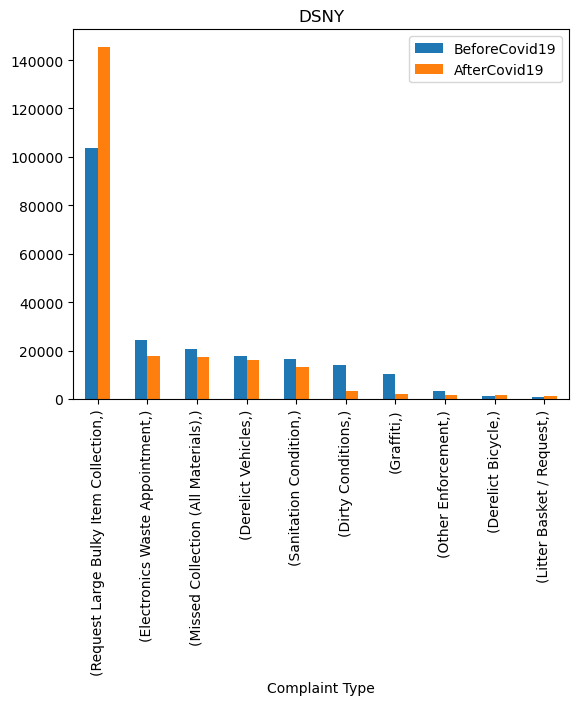

In [41]:
# Analysis of DSNY department service requests
DSNY_Comp_bcovid = before_covid_180.loc[(before_covid_180['Agency'] == 'DSNY'),['Complaint Type']].value_counts()
top_10 = DSNY_Comp_bcovid[0:10]
DSNY_Comp_Acovid = after_covid_180.loc[(after_covid_180['Agency'] == 'DSNY'),['Complaint Type']].value_counts()
top_10A = DSNY_Comp_Acovid[0:10]
index = top_10.index
df = pd.DataFrame({'BeforeCovid19': list(top_10),
                   'AfterCovid19': list(top_10A)}, index=index)
ax = df.plot.bar(rot=90,title="DSNY")

The DSNY department received more “Large Bulky Item collection requests” after covid19 than before. After increased duration of stay at home, people would have started noticing things that were no longer needed and wanted to dispose them. People were also shopping online due to COVID-19, that increased the number of large and bulky items delivery. This would have led to a need for collection services to dispose of the old items. COVID-19 also increased awareness of environmental impact of waste items that would have led to an environment friendly disposal with the help of DSNY department. The COVID-19 lockdown and other restrictions reduced other service requests considerably. If we take Electronic Waste Management request, during the pandemic, there may have been a decrease in the amount of electronic waste generated and people reduced shopping e-devices prioritizing health and safety. The vehicle/bicycle derelict requests have also reduced after COVID-19 which may be due to decrease in people's use of public spaces and reduction in municipal services.

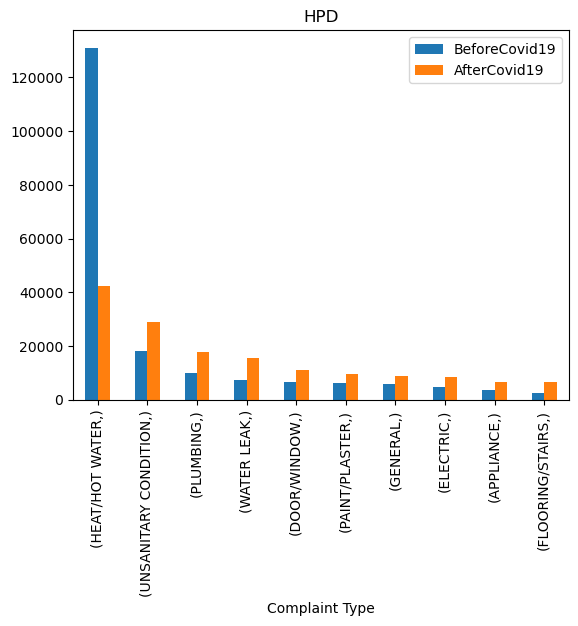

In [42]:
# Analysis of HPD department service requests
HPD_Comp_bcovid = before_covid_180.loc[(before_covid_180['Agency'] == 'HPD'),['Complaint Type']].value_counts()
top_10 = HPD_Comp_bcovid[0:10]
HPD_Comp_Acovid = after_covid_180.loc[(after_covid_180['Agency'] == 'HPD'),['Complaint Type']].value_counts()
top_10A = HPD_Comp_Acovid[0:10]
index = top_10.index
df = pd.DataFrame({'BeforeCovid19': list(top_10),
                   'AfterCovid19': list(top_10A)}, index=index)
ax = df.plot.bar(rot=90,title="HPD")

The HPD department received more requests on unsanitary condition, plumbing, water leak, and other house related services after COVID-19. With more people spending time at home during the pandemic, they may have become more aware of issues with their home's plumbing, sanitation, and other systems. This could have led to an increase in the number of requests for services related to these issues. COVID-19 also made people more aware of the importance of maintaining clean and sanitary living conditions, vigilant about reporting issues that could compromise their health and safety, such as unsanitary conditions and water leaks. The job loss or reduced income during the pandemic, would have also made it difficult for people to afford repairs or services resulting in increase in the number of requests for assistance from the HPD department.
After the pandemic, the usage of office buildings, retail stores, and restaurants decreased. There was a decrease in tourism and travel as well, that reduced the usage of hotel and other accommodations. This could have led to a decrease in the demand for hot water services from HPD, to a great extent.


### Location based analysis of COVID-19 impact on service requests

In [43]:
from pandas import IndexSlice as idx
city_bcovid = before_covid_180[['City','Agency']].value_counts().sort_index()
df = city_bcovid.to_frame('Service Counts')
df = df.sort_values(by = 'Service Counts', ascending=False)
df.head(20)



Service Counts
City          Agency                
BROOKLYN      NYPD            117627
              DSNY             79648
NEW YORK      NYPD             75134
BRONX         HPD              65802
              NYPD             64142
BROOKLYN      HPD              59508
NEW YORK      HPD              44266
BROOKLYN      DOT              28854
STATEN ISLAND DSNY             24146
BROOKLYN      DEP              20399
NEW YORK      DEP              19376
              DSNY             19219
BRONX         DSNY             18297
BROOKLYN      DOB              15765
STATEN ISLAND NYPD             12910
NEW YORK      DOT              12699
BRONX         DOT              12641
BROOKLYN      DPR              10843
NEW YORK      TLC              10215
              DOB               9967

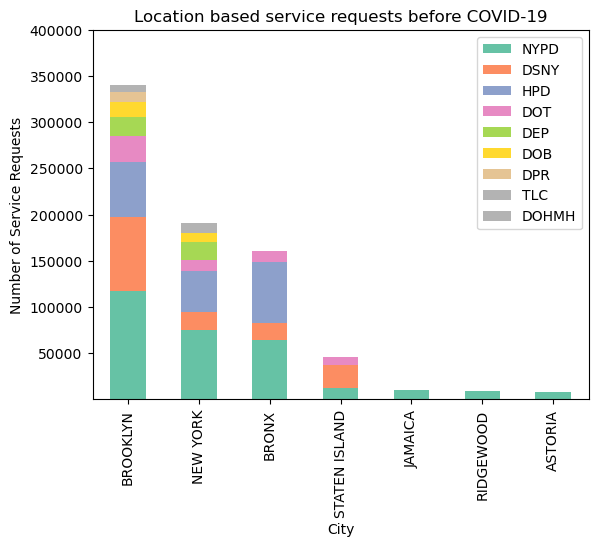

In [44]:
df1 = df.sort_values('Service Counts', ascending=False).head(25)
unstacked_df = df1.unstack()
# Set the unstacked column labels as legend labels
labels = unstacked_df.columns.get_level_values(1).unique().tolist()
unstacked_df.plot(kind='bar', stacked=True, colormap='Set2')
plt.legend(labels)
plt.title("Location based service requests before COVID-19")
plt.xlabel("City")
plt.ylabel("Number of Service Requests")
plt.yticks([50000,100000,150000,200000,250000,300000,350000,400000])
plt.show()

In [45]:
city_Acovid = after_covid_180[['City','Agency']].value_counts().sort_index()
df3 = city_Acovid.to_frame('Service Counts')
df3 = df3.sort_values(by = 'Service Counts', ascending=False)
df3.head(20)

,,Service Counts
City,Agency,
BRONX,NYPD,185293
BROOKLYN,NYPD,171530
NEW YORK,NYPD,136395
BROOKLYN,DSNY,78826
BRONX,HPD,56730
BROOKLYN,HPD,48397
NEW YORK,HPD,32217
BROOKLYN,DPR,30078
NEW YORK,DSNY,26996


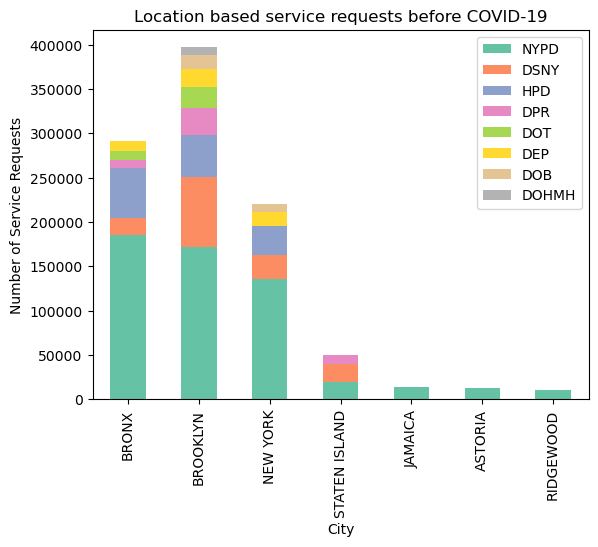

In [46]:
df4 = df3.sort_values('Service Counts', ascending=False).head(25)
unstacked_df1 = df4.unstack()
#Set the unstacked column labels as legend labels
labels = unstacked_df1.columns.get_level_values(1).unique().tolist()
unstacked_df1.plot(kind='bar', stacked=True, colormap='Set2')
plt.legend(labels)
plt.title("Location based service requests before COVID-19")
plt.xlabel("City")
plt.ylabel("Number of Service Requests")
plt.show()

Let's examine whether COVID-19 had an effect on the top 4 cities with the highest service requests. The agencies got increased service requests from BROOKLYN, BRONX, NEW YORK city, and STATEN ISLAND both before and after COVID-19. Following COVID-19, the number of service requests from these cities dramatically rose. 

Following COVID-19, BROOKLYN's NYPD department received more service requests than it did before to COVID-19, whereas HDP received less requests.This could be a result of the severe economic collapse that followed the pandemic, which caused many individuals to lose their employment and experience financial hardship. People may have been less concerned with housing-related complaints and service requests as a result, since they may have been more concerned with meeting their immediate financial needs.

COVID-19 had a significant impact on the Bronx, as seen by the sharp rise in NYPD service calls.Following Covid19, a sizable number of requests were made to the departments of DPR (Dept of Parks and Recreation), DOT (Dept of Transportation), and DEP (Dept of Environmental Protection). Covid19 is a significant element that raised the number of DPR service requests. Parks and recreational areas were crucial in promoting the public's health and wellbeing during the epidemic restrictions.

New York and Staten Island also saw an increase in NYPD service requests, similar to the other two cities.